In [379]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from datetime import date
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import calendar
import numpy as np
%matplotlib inline

In [290]:
data=pd.read_csv("data.csv")

In [291]:
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [292]:
data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,453159.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079,1980.404787
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959,10.513488
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000,1886.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000,1974.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000,1983.000000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000,1988.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000,1999.000000


In [293]:
data.drop_duplicates()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female
5,9226,2017-12-31 22:51:00.9180,2018-01-01 01:24:47.1660,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1487,Customer,NaN,NaN
6,4507,2017-12-31 23:49:28.4220,2018-01-01 01:04:35.6190,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,1991.0,Female
7,4334,2017-12-31 23:46:37.1960,2018-01-01 00:58:51.2110,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,1503,Customer,NaN,NaN
8,4150,2017-12-31 23:37:07.5480,2018-01-01 00:46:18.3080,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,3125,Customer,NaN,NaN
9,4238,2017-12-31 23:35:38.1450,2018-01-01 00:46:17.0530,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,2543,Customer,NaN,NaN


In [294]:
print(data.columns)
len(data.columns)

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender'],
      dtype='object')


15

In [295]:
data['Origin']=data['start_station_id'].map(str)+" "+data['start_station_name']+" "+data['start_station_latitude'].map(str)+" "+data['start_station_longitude'].map(str)

In [296]:
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,Origin
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,74 Laguna St at Hayes St 37.77643481920474 -12...
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female,284 Yerba Buena Center for the Arts (Howard St...
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN,245 Downtown Berkeley BART 37.8703477 -122.267...
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN,60 8th St at Ringold St 37.774520401136854 -12...
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female,239 Bancroft Way at Telegraph Ave 37.8688126 -...


In [297]:
print(data['Origin'].value_counts())

15 San Francisco Ferry Building (Harry Bridges Plaza) 37.795392 -122.394203                     15187
6 The Embarcadero at Sansome St 37.80477 -122.40323400000001                                    13664
30 San Francisco Caltrain (Townsend St at 4th St) 37.776598 -122.39528200000001                 12546
67 San Francisco Caltrain Station 2  (Townsend St at 4th St) 37.776639200000005 -122.3955263    12055
58 Market St at 10th St 37.776619000000004 -122.41738500000001                                  11960
21 Montgomery St BART Station (Market St at 2nd St) 37.7896254 -122.400811                      11334
81 Berry St at 4th St 37.77588 -122.39317                                                       10956
3 Powell St BART Station (Market St at 4th St) 37.78637526861584 -122.40490436553955            10142
22 Howard St at Beale St 37.789756 -122.39464299999999                                           9926
16 Steuart St at Market St 37.794129999999996 -122.39443                          

In [298]:
print(len(set(data['start_station_id'])))

272


In [299]:
del data['start_station_name'],data['start_station_latitude'],data['start_station_longitude'],data['Origin']

In [300]:
data['End']=data['end_station_id'].map(str)+" "+data['end_station_name']+" "+data['end_station_latitude'].map(str)+" "+data['end_station_longitude'].map(str)

In [301]:
print(data['End'].value_counts())

30 San Francisco Caltrain (Townsend St at 4th St) 37.776598 -122.39528200000001                 17378
15 San Francisco Ferry Building (Harry Bridges Plaza) 37.795392 -122.394203                     17109
6 The Embarcadero at Sansome St 37.80477 -122.40323400000001                                    16531
67 San Francisco Caltrain Station 2  (Townsend St at 4th St) 37.776639200000005 -122.3955263    13658
21 Montgomery St BART Station (Market St at 2nd St) 37.7896254 -122.400811                      13443
58 Market St at 10th St 37.776619000000004 -122.41738500000001                                  11298
3 Powell St BART Station (Market St at 4th St) 37.78637526861584 -122.40490436553955            11064
81 Berry St at 4th St 37.77588 -122.39317                                                       10611
16 Steuart St at Market St 37.794129999999996 -122.39443                                         9321
5 Powell St BART Station (Market St at 5th St) 37.78389935708493 -122.408444881439

In [302]:
print(len(set(data['end_station_id'])))

272


In [303]:
del data['end_station_name'],data['end_station_latitude'],data['end_station_longitude'],data['End']

In [304]:
data.head()

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,43,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,96,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,245,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,5,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,247,3167,Subscriber,1997.0,Female


In [305]:
data['S_Day'], data['S_time'] = data['start_time'].str.split(' ', 1).str

In [306]:
data.head()

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,member_birth_year,member_gender,S_Day,S_time
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,43,96,Customer,1987.0,Male,2017-12-31,16:57:39.6540
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,96,88,Customer,1965.0,Female,2017-12-31,15:56:34.8420
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,245,1094,Customer,NaN,NaN,2017-12-31,22:45:48.4110
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,5,2831,Customer,NaN,NaN,2017-12-31,17:31:10.6360
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,247,3167,Subscriber,1997.0,Female,2017-12-31,14:23:14.0010


In [307]:
del data['start_time']

In [308]:
data['E_Day'], data['E_time'] = data['end_time'].str.split(' ', 1).str

In [309]:
del data['end_time']

In [310]:
data.head()

,duration_sec,start_station_id,end_station_id,bike_id,user_type,member_birth_year,member_gender,S_Day,S_time,E_Day,E_time
0,80110,74,43,96,Customer,1987.0,Male,2017-12-31,16:57:39.6540,2018-01-01,15:12:50.2450
1,78800,284,96,88,Customer,1965.0,Female,2017-12-31,15:56:34.8420,2018-01-01,13:49:55.6170
2,45768,245,245,1094,Customer,NaN,NaN,2017-12-31,22:45:48.4110,2018-01-01,11:28:36.8830
3,62172,60,5,2831,Customer,NaN,NaN,2017-12-31,17:31:10.6360,2018-01-01,10:47:23.5310
4,43603,239,247,3167,Subscriber,1997.0,Female,2017-12-31,14:23:14.0010,2018-01-01,02:29:57.5710


In [311]:
print(data['S_Day'].value_counts())

2017-10-26    4682
2017-11-07    4528
2017-11-14    4487
2017-10-24    4473
2017-12-06    4391
2017-10-04    4380
2017-11-09    4367
2017-10-23    4356
2017-10-25    4340
2017-12-05    4338
2017-12-07    4330
2017-10-03    4323
2017-12-11    4303
2017-11-02    4299
2017-12-12    4275
2017-11-29    4270
2017-11-30    4265
2017-10-05    4265
2017-12-13    4262
2017-11-01    4259
2017-12-14    4229
2017-11-28    4221
2017-10-27    4215
2017-10-31    4209
2017-11-06    4205
2017-09-27    4183
2017-09-28    4166
2017-12-01    4124
2017-11-08    4106
2017-09-19    4098
              ... 
2017-07-12    1556
2017-07-11    1506
2017-08-06    1494
2017-12-26    1453
2017-07-22    1449
2017-12-30    1444
2017-12-31    1410
2017-07-10    1347
2017-07-29    1333
2017-07-30    1278
2017-07-06    1277
2017-07-23    1190
2017-11-23    1186
2017-07-07    1126
2017-07-05    1103
2017-07-15    1086
2017-06-30    1038
2017-06-29    1019
2017-07-16     955
2017-12-23     935
2017-12-24     819
2017-12-25  

In [312]:
print(data['E_Day'].value_counts())

2017-10-26    4684
2017-11-07    4518
2017-11-14    4479
2017-10-24    4467
2017-12-06    4392
2017-10-04    4378
2017-10-23    4361
2017-11-09    4353
2017-10-25    4342
2017-12-05    4336
2017-10-03    4330
2017-12-07    4322
2017-12-11    4310
2017-11-02    4306
2017-12-12    4270
2017-11-29    4269
2017-11-30    4266
2017-12-13    4262
2017-10-05    4259
2017-11-01    4258
2017-12-14    4226
2017-11-28    4219
2017-10-27    4215
2017-10-31    4210
2017-11-06    4208
2017-09-27    4182
2017-09-28    4169
2017-12-01    4115
2017-11-08    4113
2017-09-19    4097
              ... 
2017-07-11    1500
2017-08-06    1497
2017-12-26    1452
2017-12-30    1447
2017-07-22    1439
2017-12-31    1394
2017-07-10    1345
2017-07-29    1327
2017-07-30    1282
2017-07-06    1275
2017-07-23    1200
2017-11-23    1183
2017-07-07    1125
2017-07-05    1106
2017-07-15    1088
2017-06-30    1041
2017-06-29    1016
2017-07-16     950
2017-12-23     936
2017-12-24     816
2017-12-25     712
2017-11-26  

# # Hence most busiest day was 26-10-2017

In [313]:
print(data['end_station_id'].value_counts())

30     17378
15     17109
6      16531
67     13658
21     13443
58     11298
3      11064
81     10611
16      9321
5       8563
22      7791
50      7277
90      6681
17      6320
44      6275
66      6132
23      5814
25      5722
19      5651
48      5581
182     5505
24      5441
20      5232
45      5095
59      4574
98      4472
8       4381
27      4289
28      4179
134     4138
       ...  
289      103
219       92
234       83
224       71
265       70
288       65
269       65
131       63
226       61
254       60
206       56
216       55
263       49
283       48
337       48
338       48
300       37
229       36
228       31
237       30
258       29
301       22
293       19
267       18
299       17
294        7
340        4
339        3
292        2
268        2
Name: end_station_id, Length: 272, dtype: int64


# Hence Most rides end at San Francisco Caltrain (Townsend St at 4th St)

In [314]:
def frequent_riders(n):
    print(data['bike_id'].value_counts()[:n])
inp=int(input("Enter no of frequent users:"))
frequent_riders(inp)

Enter no of frequent users:


ValueError: invalid literal for int() with base 10: ''

In [315]:
data['together']=data['end_station_id'].map(str)+" "+data['start_station_id'].map(str)+" "+data['S_time'].map(str)+" "+data['E_time'].map(str)+" "+data['S_Day'].map(str)+" "+data['E_Day'].map(str)

In [316]:
print(set(data['together'].value_counts()))
print(data['together'].value_counts())


{1}
19 19 08:37:24.8340 09:04:49.4420 2017-09-25 2017-09-25      1
74 59 17:49:05.7880 17:59:52.7920 2017-12-19 2017-12-19      1
182 179 07:07:43.6050 07:10:58.9220 2017-07-20 2017-07-20    1
182 196 15:46:03.5710 15:51:17.5660 2017-12-02 2017-12-02    1
85 53 07:32:37.7670 07:37:50.7960 2017-10-12 2017-10-12      1
42 42 12:13:45.7140 12:46:39.4380 2017-07-08 2017-07-08      1
160 230 08:08:10.9770 08:11:34.7460 2017-10-26 2017-10-26    1
17 30 08:24:11.5340 09:06:42.9120 2017-12-04 2017-12-04      1
58 72 09:18:09.3690 09:25:25.4560 2017-11-14 2017-11-14      1
16 106 10:45:11.5780 11:08:17.5310 2017-11-09 2017-11-09     1
31 42 08:01:34.2710 08:11:23.4070 2017-10-10 2017-10-10      1
323 10 09:49:19.2120 10:01:18.6410 2017-09-18 2017-09-18     1
172 150 16:22:52.9270 16:51:04.7830 2017-09-17 2017-09-17    1
25 41 09:41:32.3350 09:50:35.2520 2017-12-13 2017-12-13      1
127 146 08:38:00.1550 08:44:17.7840 2017-09-27 2017-09-27    1
6 28 19:31:18.0800 20:20:35.5270 2017-07-28 2017-07

# Since no two riders share same time or station,no2 friends take rides together

In [317]:
del data['together']

In [318]:
data.head()

,duration_sec,start_station_id,end_station_id,bike_id,user_type,member_birth_year,member_gender,S_Day,S_time,E_Day,E_time
0,80110,74,43,96,Customer,1987.0,Male,2017-12-31,16:57:39.6540,2018-01-01,15:12:50.2450
1,78800,284,96,88,Customer,1965.0,Female,2017-12-31,15:56:34.8420,2018-01-01,13:49:55.6170
2,45768,245,245,1094,Customer,NaN,NaN,2017-12-31,22:45:48.4110,2018-01-01,11:28:36.8830
3,62172,60,5,2831,Customer,NaN,NaN,2017-12-31,17:31:10.6360,2018-01-01,10:47:23.5310
4,43603,239,247,3167,Subscriber,1997.0,Female,2017-12-31,14:23:14.0010,2018-01-01,02:29:57.5710


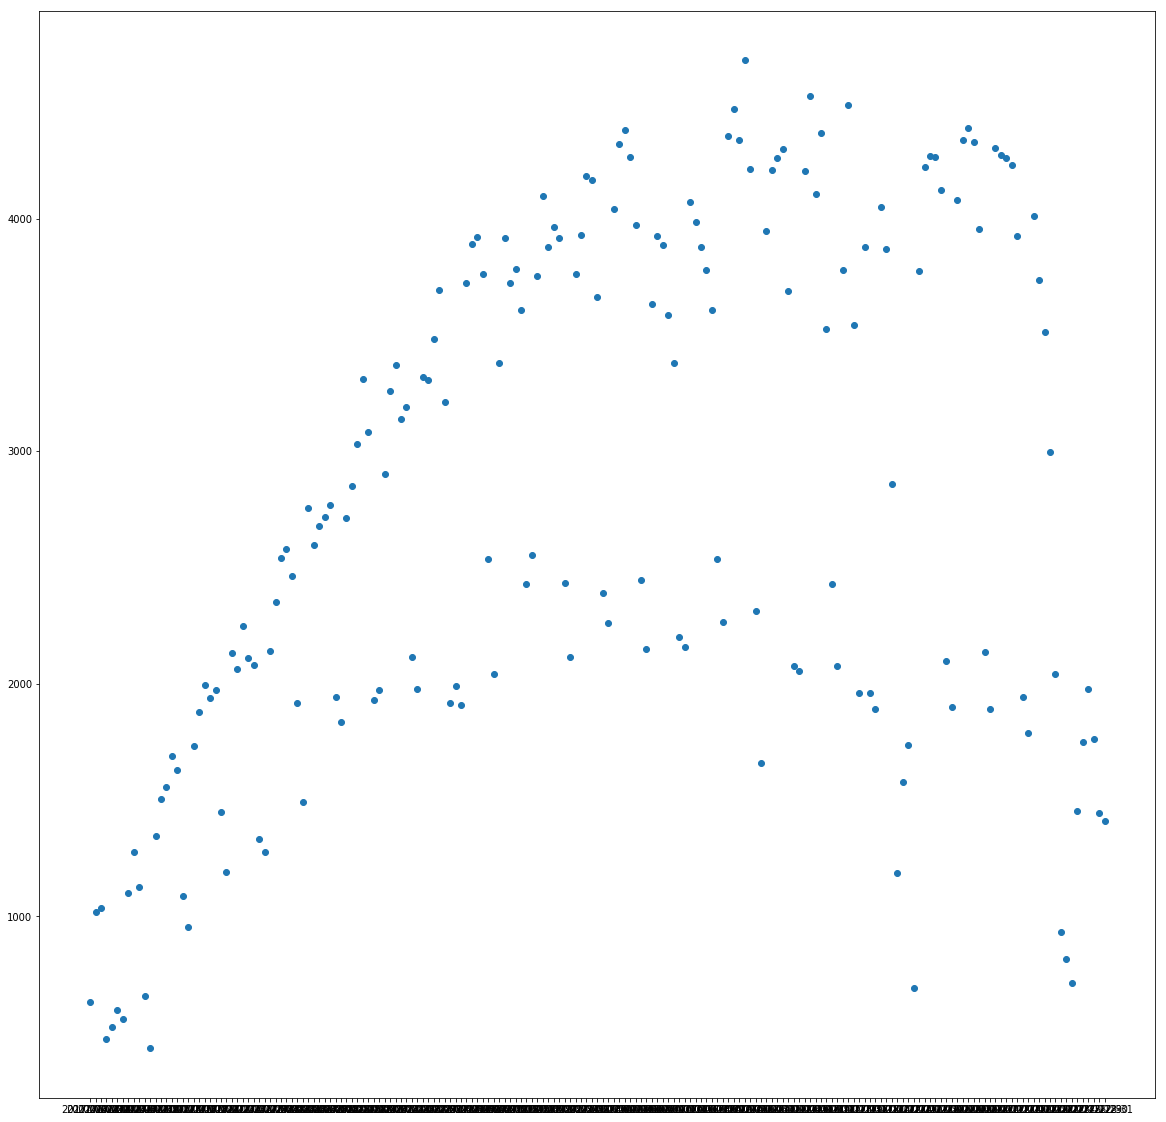

In [319]:
day=data['S_Day'].value_counts()
plt.figure(figsize=(20,20))
plt.scatter(day.index,day.values)

Index(['2017-10-26', '2017-11-07', '2017-11-14', '2017-10-24', '2017-12-06',
       '2017-10-04', '2017-11-09', '2017-10-23', '2017-10-25', '2017-12-05',
       '2017-12-07', '2017-10-03', '2017-12-11', '2017-11-02', '2017-12-12',
       '2017-11-29', '2017-11-30', '2017-10-05', '2017-12-13', '2017-11-01',
       '2017-12-14', '2017-11-28', '2017-10-27', '2017-10-31', '2017-11-06',
       '2017-09-27', '2017-09-28', '2017-12-01', '2017-11-08', '2017-09-19',
       '2017-12-04', '2017-10-16', '2017-11-20', '2017-10-02', '2017-12-18'],
      dtype='object')


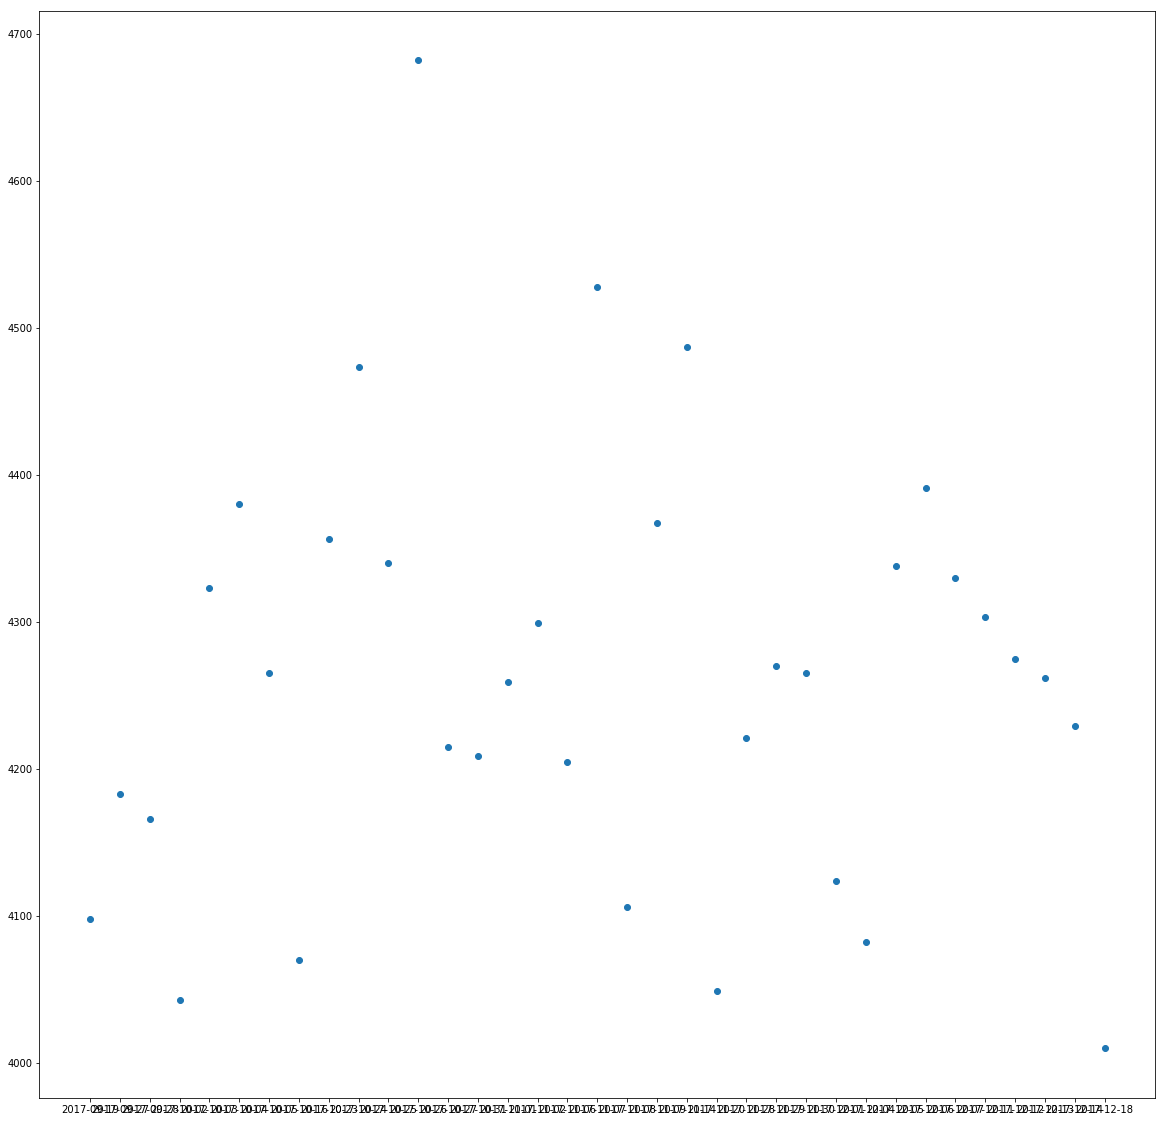

In [320]:
x=day.index[day.values>4000]
y=day.values[day.values>4000]
plt.figure(figsize=(20,20))
plt.scatter(x,y)
print(x)

Index(['2017-10-26', '2017-11-07', '2017-11-14', '2017-10-24', '2017-12-06',
       '2017-10-04', '2017-10-23', '2017-11-09', '2017-10-25', '2017-12-05',
       '2017-10-03', '2017-12-07', '2017-12-11', '2017-11-02', '2017-12-12',
       '2017-11-29', '2017-11-30', '2017-12-13', '2017-10-05', '2017-11-01',
       '2017-12-14', '2017-11-28', '2017-10-27', '2017-10-31', '2017-11-06',
       '2017-09-27', '2017-09-28', '2017-12-01', '2017-11-08', '2017-09-19',
       '2017-12-04', '2017-10-16', '2017-11-20', '2017-10-02', '2017-12-18'],
      dtype='object')


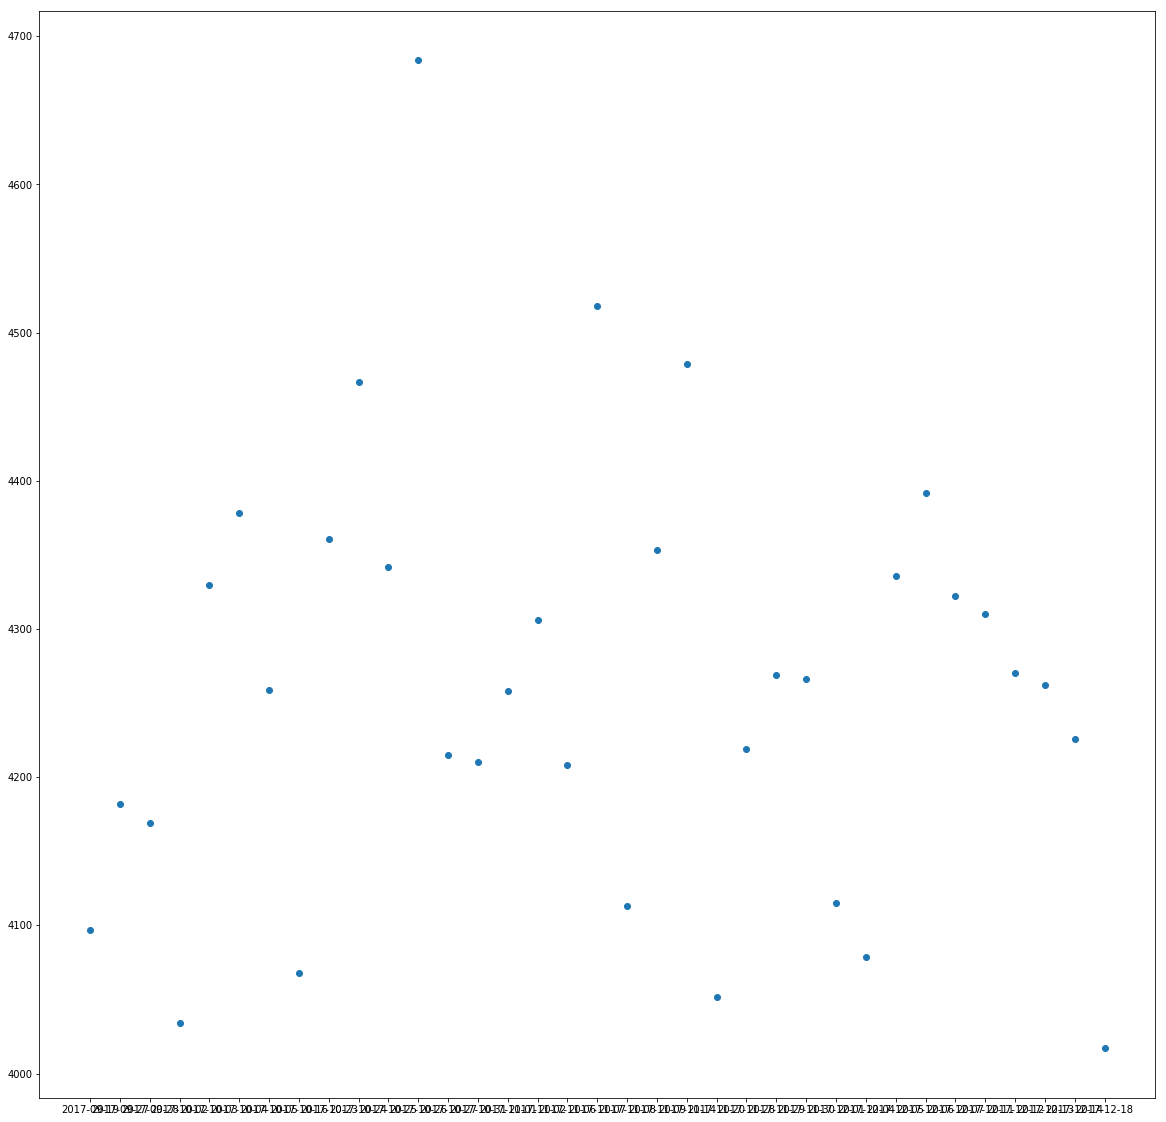

In [321]:
day=data['E_Day'].value_counts()
x=day.index[day.values>4000]
y=day.values[day.values>4000]
plt.figure(figsize=(20,20))
plt.scatter(x,y)
print(x)

In [322]:
days=[]
for i in x:
    i = datetime.strptime(i, '%Y-%m-%d')
    days.append(calendar.day_name[i.weekday()])
print(Counter(days))

Counter({'Tuesday': 9, 'Thursday': 8, 'Wednesday': 8, 'Monday': 8, 'Friday': 2})


# Although unexpected ,holidays and no of trips donot have a direct corelation.Instead people rent more bikes on weekdays as compared to Weekend

In [323]:
data.head()

,duration_sec,start_station_id,end_station_id,bike_id,user_type,member_birth_year,member_gender,S_Day,S_time,E_Day,E_time
0,80110,74,43,96,Customer,1987.0,Male,2017-12-31,16:57:39.6540,2018-01-01,15:12:50.2450
1,78800,284,96,88,Customer,1965.0,Female,2017-12-31,15:56:34.8420,2018-01-01,13:49:55.6170
2,45768,245,245,1094,Customer,NaN,NaN,2017-12-31,22:45:48.4110,2018-01-01,11:28:36.8830
3,62172,60,5,2831,Customer,NaN,NaN,2017-12-31,17:31:10.6360,2018-01-01,10:47:23.5310
4,43603,239,247,3167,Subscriber,1997.0,Female,2017-12-31,14:23:14.0010,2018-01-01,02:29:57.5710


In [324]:
station=data.groupby('start_station_id', as_index=False)['duration_sec'].mean()

In [325]:
print(station)

     start_station_id  duration_sec
0                   3   1391.524946
1                   4   1903.231804
2                   5   1266.413046
3                   6   1724.352313
4                   7   1080.039182
5                   8   1832.257672
6                   9    944.874552
7                  10   1939.245022
8                  11   1062.528497
9                  13    974.017389
10                 14   1196.635022
11                 15   1541.484823
12                 16   1013.884455
13                 17    946.732645
14                 18   1230.833052
15                 19   1084.502065
16                 20    985.825172
17                 21    947.038204
18                 22    787.695144
19                 23   1012.090803
20                 24    919.366611
21                 25    769.898988
22                 26    901.115589
23                 27    807.647746
24                 28   1104.983579
25                 29   1886.236133
26                 30    828

In [326]:
inp=int(input("Enter Station no for which you need Duration "))
print(station[station['start_station_id']==inp])

Enter Station no for which you need Duration 


ValueError: invalid literal for int() with base 10: ''

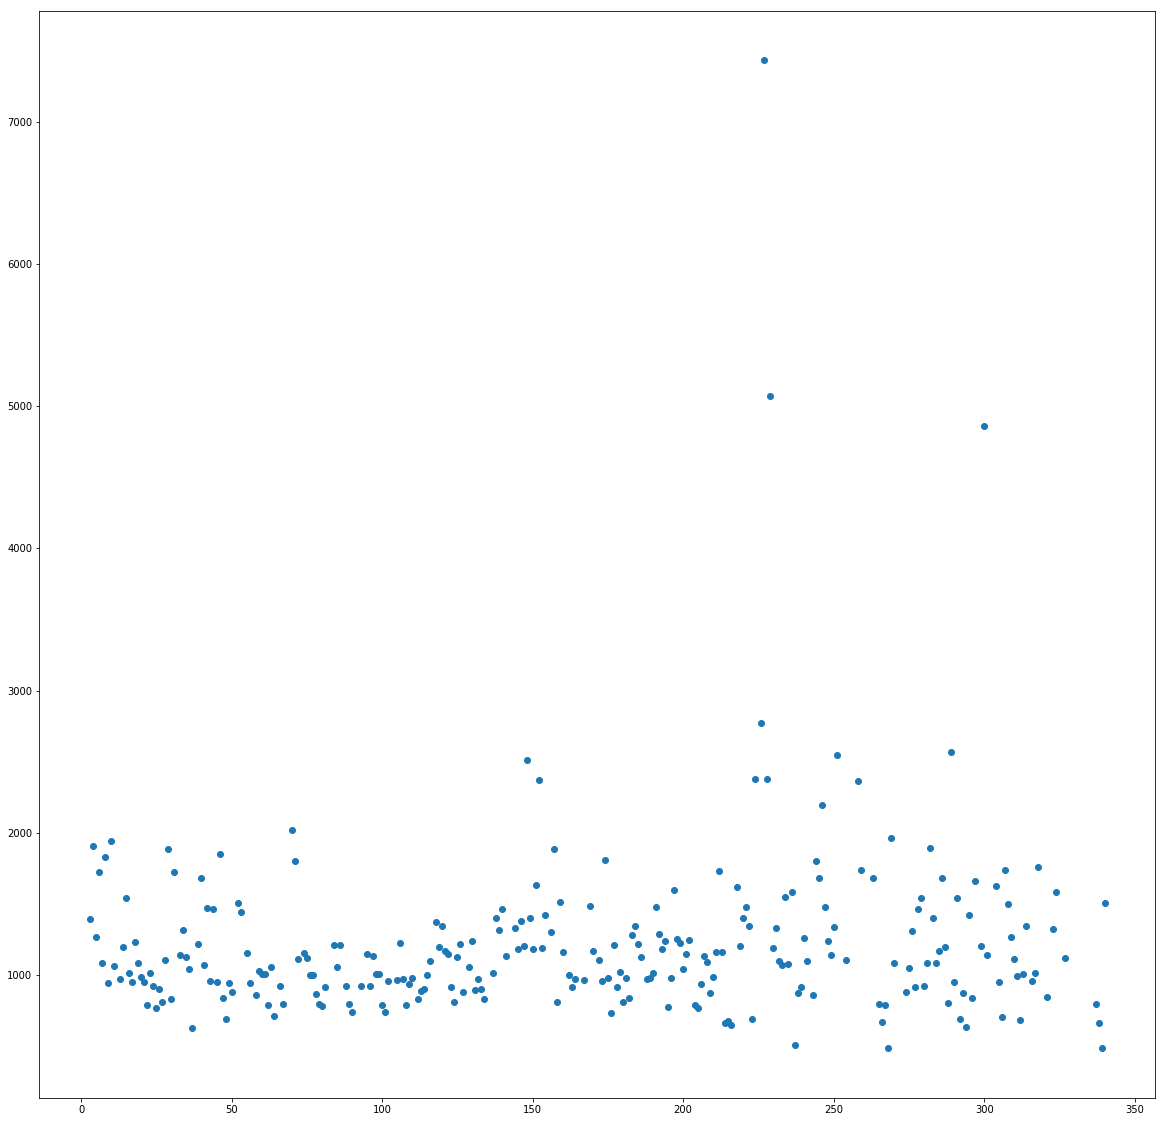

In [327]:
plt.figure(figsize=(20,20))
plt.scatter(station['start_station_id'],station['duration_sec'])

In [328]:
print(station[station['duration_sec']>=0.60*max(station['duration_sec'])])

     start_station_id  duration_sec
189               227   7434.557432
191               229   5070.179487
248               300   4858.620690


In [329]:
print("227 represents Foothill Blvd at Fruitvale Ave")
print("229 represents Foothill Blvd at 42 Ave")
print("It is one of the most densly populated and has some lower-middle income neighbourhoods.Also it is one of the top 5% walkable location overall US ")

227 represents Foothill Blvd at Fruitvale Ave
229 represents Foothill Blvd at 42 Ave
It is one of the most densly populated and has some lower-middle income neighbourhoods.Also it is one of the top 5% walkable location overall US 


In [330]:
data.head()

,duration_sec,start_station_id,end_station_id,bike_id,user_type,member_birth_year,member_gender,S_Day,S_time,E_Day,E_time
0,80110,74,43,96,Customer,1987.0,Male,2017-12-31,16:57:39.6540,2018-01-01,15:12:50.2450
1,78800,284,96,88,Customer,1965.0,Female,2017-12-31,15:56:34.8420,2018-01-01,13:49:55.6170
2,45768,245,245,1094,Customer,NaN,NaN,2017-12-31,22:45:48.4110,2018-01-01,11:28:36.8830
3,62172,60,5,2831,Customer,NaN,NaN,2017-12-31,17:31:10.6360,2018-01-01,10:47:23.5310
4,43603,239,247,3167,Subscriber,1997.0,Female,2017-12-31,14:23:14.0010,2018-01-01,02:29:57.5710


In [331]:
data[['S_Year','S_Month','S_date']] = data['S_Day'].str.split('-',expand=True)

In [332]:
data.head()

,duration_sec,start_station_id,end_station_id,bike_id,user_type,member_birth_year,member_gender,S_Day,S_time,E_Day,E_time,S_Year,S_Month,S_date
0,80110,74,43,96,Customer,1987.0,Male,2017-12-31,16:57:39.6540,2018-01-01,15:12:50.2450,2017,12,31
1,78800,284,96,88,Customer,1965.0,Female,2017-12-31,15:56:34.8420,2018-01-01,13:49:55.6170,2017,12,31
2,45768,245,245,1094,Customer,NaN,NaN,2017-12-31,22:45:48.4110,2018-01-01,11:28:36.8830,2017,12,31
3,62172,60,5,2831,Customer,NaN,NaN,2017-12-31,17:31:10.6360,2018-01-01,10:47:23.5310,2017,12,31
4,43603,239,247,3167,Subscriber,1997.0,Female,2017-12-31,14:23:14.0010,2018-01-01,02:29:57.5710,2017,12,31


In [333]:
monthly=data['S_Month'].value_counts()

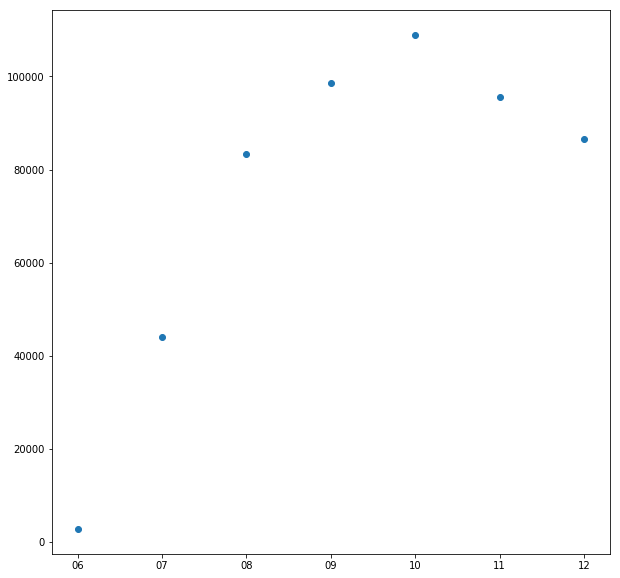

In [334]:
plt.figure(figsize=(10,10))
plt.scatter(monthly.index,monthly.values)

# October Shows maximum no of rides taken

In [335]:
data.head()

,duration_sec,start_station_id,end_station_id,bike_id,user_type,member_birth_year,member_gender,S_Day,S_time,E_Day,E_time,S_Year,S_Month,S_date
0,80110,74,43,96,Customer,1987.0,Male,2017-12-31,16:57:39.6540,2018-01-01,15:12:50.2450,2017,12,31
1,78800,284,96,88,Customer,1965.0,Female,2017-12-31,15:56:34.8420,2018-01-01,13:49:55.6170,2017,12,31
2,45768,245,245,1094,Customer,NaN,NaN,2017-12-31,22:45:48.4110,2018-01-01,11:28:36.8830,2017,12,31
3,62172,60,5,2831,Customer,NaN,NaN,2017-12-31,17:31:10.6360,2018-01-01,10:47:23.5310,2017,12,31
4,43603,239,247,3167,Subscriber,1997.0,Female,2017-12-31,14:23:14.0010,2018-01-01,02:29:57.5710,2017,12,31


In [336]:
types=data['user_type'].value_counts()
print(types.values)

[409230 110470]


<Container object of 2 artists>

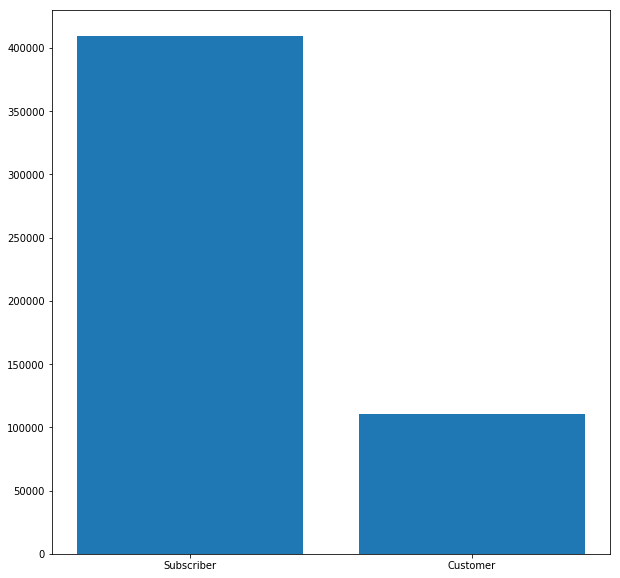

In [337]:
plt.figure(figsize=(10,10))
plt.bar(range(len(types.values)),types.values,tick_label=types.index)

# Regular Suscribers are much more likely to take trips as compared to customers.

In [338]:
data.head()

,duration_sec,start_station_id,end_station_id,bike_id,user_type,member_birth_year,member_gender,S_Day,S_time,E_Day,E_time,S_Year,S_Month,S_date
0,80110,74,43,96,Customer,1987.0,Male,2017-12-31,16:57:39.6540,2018-01-01,15:12:50.2450,2017,12,31
1,78800,284,96,88,Customer,1965.0,Female,2017-12-31,15:56:34.8420,2018-01-01,13:49:55.6170,2017,12,31
2,45768,245,245,1094,Customer,NaN,NaN,2017-12-31,22:45:48.4110,2018-01-01,11:28:36.8830,2017,12,31
3,62172,60,5,2831,Customer,NaN,NaN,2017-12-31,17:31:10.6360,2018-01-01,10:47:23.5310,2017,12,31
4,43603,239,247,3167,Subscriber,1997.0,Female,2017-12-31,14:23:14.0010,2018-01-01,02:29:57.5710,2017,12,31


In [339]:
data.member_birth_year.fillna(value=2018,inplace=True)
data['member_birth_age']=pd.Series([2018-int(i) for i in data.member_birth_year])

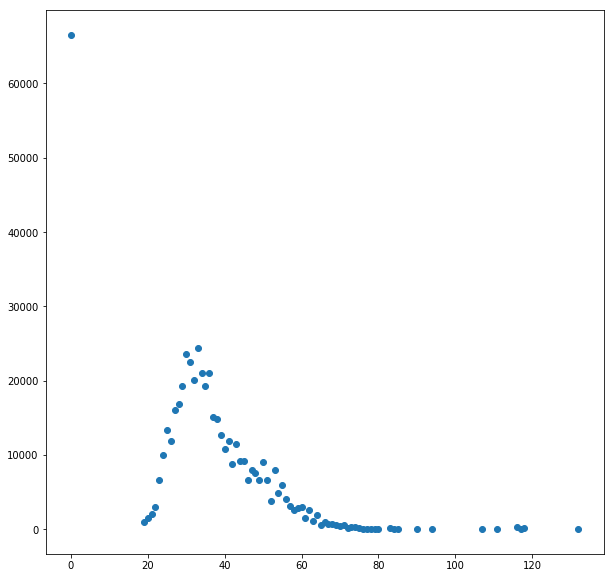

In [340]:
age=data.member_birth_age.value_counts()
plt.figure(figsize=(10,10))
plt.scatter(age.index,age.values)

# Most rentals are preferred by  people around age 25-30

In [341]:
gender = data.member_gender.value_counts()
gender

Male      348318
Female     98621
Other       6299
Name: member_gender, dtype: int64

<Container object of 3 artists>

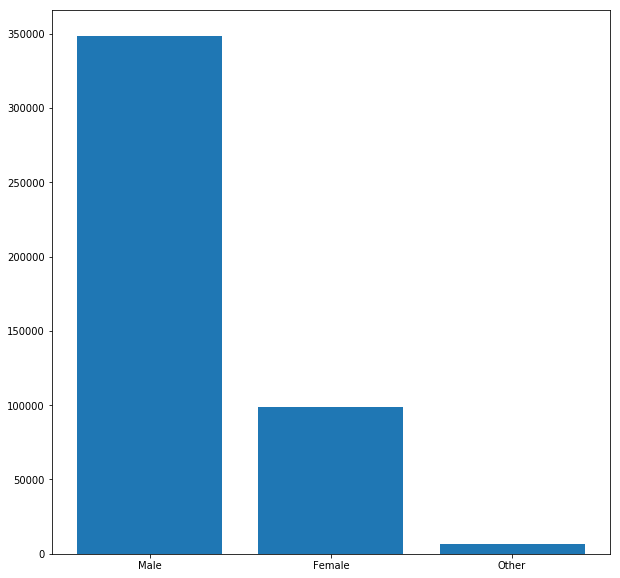

In [342]:
plt.figure(figsize=(10,10))
plt.bar(range(len(gender.values)),gender.values,tick_label=gender.index)

# Males outnumber women by huge amount

In [343]:
day=list(data['S_Day'])
print(day[:20])

['2017-12-31', '2017-12-31', '2017-12-31', '2017-12-31', '2017-12-31', '2017-12-31', '2017-12-31', '2017-12-31', '2017-12-31', '2017-12-31', '2017-12-31', '2017-12-31', '2017-12-31', '2017-12-31', '2017-12-31', '2017-12-31', '2017-12-31', '2017-12-31', '2017-12-31', '2017-12-31']


In [344]:
days2=[]
for i in day:
    i = datetime.strptime(i, '%Y-%m-%d')
    days2.append(calendar.day_name[i.weekday()])
sol=Counter(days2)

In [345]:
value=list(sol.values())
print(value)

[45391, 50874, 81165, 85243, 87752, 87865, 81410]


<Container object of 7 artists>

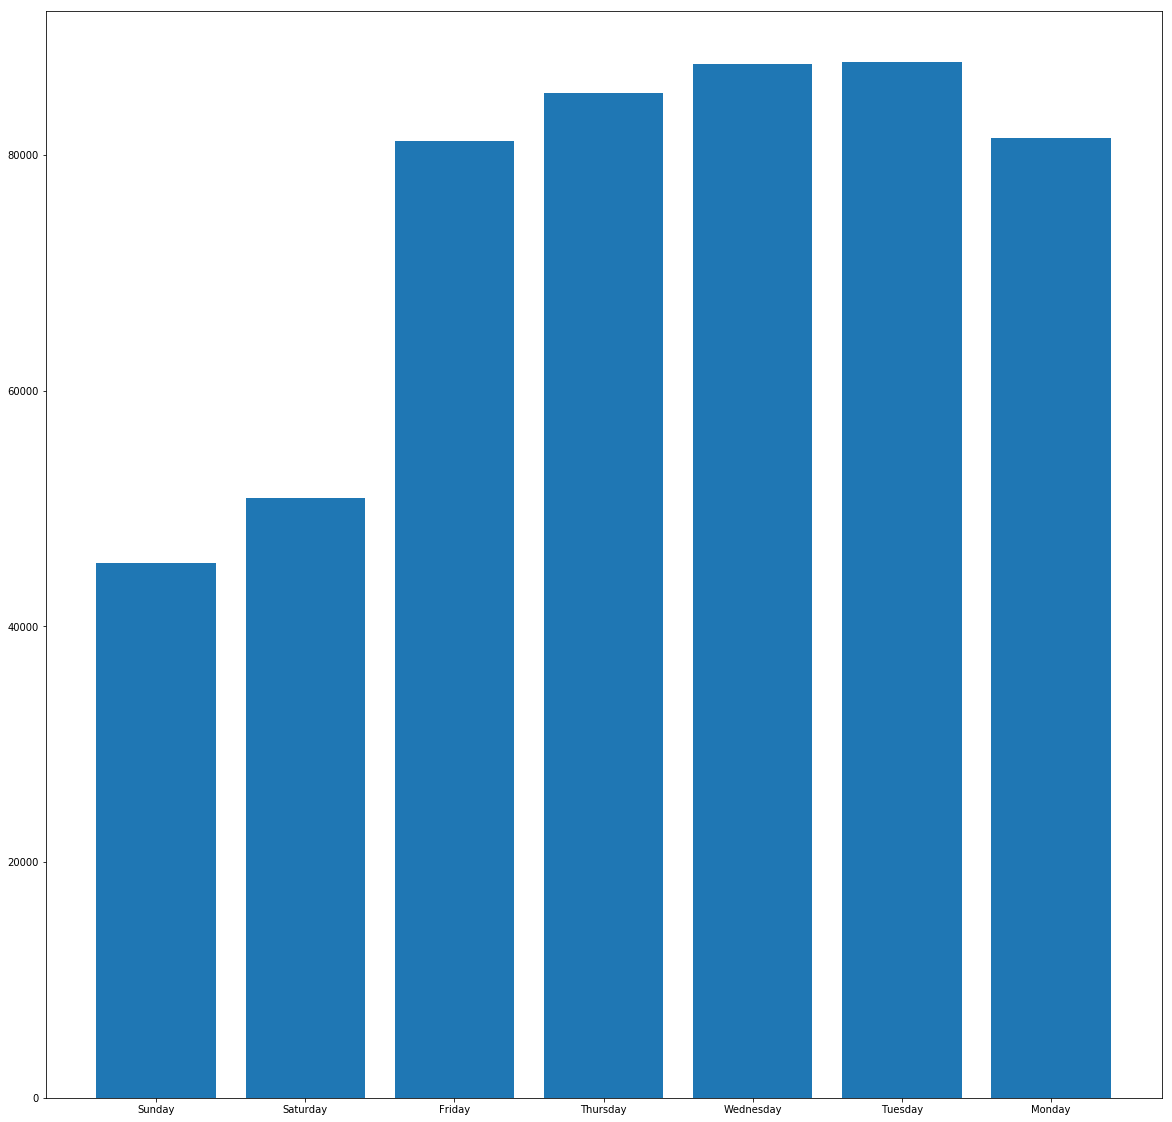

In [346]:
plt.figure(figsize=(20,20))
plt.bar(range(len(list(sol.values()))),list(sol.values()),tick_label=list(sol.keys()))

In [348]:
data.head()
data2=data.copy()

In [349]:
data[['S_Hour','S_Minute','S_sec']] = data['S_time'].str.split(':',expand=True)

In [350]:
data.head()

,duration_sec,start_station_id,end_station_id,bike_id,user_type,member_birth_year,member_gender,S_Day,S_time,E_Day,E_time,S_Year,S_Month,S_date,member_birth_age,S_Hour,S_Minute,S_sec
0,80110,74,43,96,Customer,1987.0,Male,2017-12-31,16:57:39.6540,2018-01-01,15:12:50.2450,2017,12,31,31,16,57,39.6540
1,78800,284,96,88,Customer,1965.0,Female,2017-12-31,15:56:34.8420,2018-01-01,13:49:55.6170,2017,12,31,53,15,56,34.8420
2,45768,245,245,1094,Customer,2018.0,NaN,2017-12-31,22:45:48.4110,2018-01-01,11:28:36.8830,2017,12,31,0,22,45,48.4110
3,62172,60,5,2831,Customer,2018.0,NaN,2017-12-31,17:31:10.6360,2018-01-01,10:47:23.5310,2017,12,31,0,17,31,10.6360
4,43603,239,247,3167,Subscriber,1997.0,Female,2017-12-31,14:23:14.0010,2018-01-01,02:29:57.5710,2017,12,31,21,14,23,14.0010


In [351]:
data['S_Hour']=data['S_Hour'].apply(lambda x:float(x)/24)
data['S_Minute']=data['S_Minute'].apply(lambda x:float(x)/60)
data['S_Sec']=data['S_sec'].apply(lambda x:float(x)/60)

In [353]:
del data['S_sec']

In [354]:
data.head()

,duration_sec,start_station_id,end_station_id,bike_id,user_type,member_birth_year,member_gender,S_Day,S_time,E_Day,E_time,S_Year,S_Month,S_date,member_birth_age,S_Hour,S_Minute,S_Sec
0,80110,74,43,96,Customer,1987.0,Male,2017-12-31,16:57:39.6540,2018-01-01,15:12:50.2450,2017,12,31,31,0.666667,0.950000,0.660900
1,78800,284,96,88,Customer,1965.0,Female,2017-12-31,15:56:34.8420,2018-01-01,13:49:55.6170,2017,12,31,53,0.625000,0.933333,0.580700
2,45768,245,245,1094,Customer,2018.0,NaN,2017-12-31,22:45:48.4110,2018-01-01,11:28:36.8830,2017,12,31,0,0.916667,0.750000,0.806850
3,62172,60,5,2831,Customer,2018.0,NaN,2017-12-31,17:31:10.6360,2018-01-01,10:47:23.5310,2017,12,31,0,0.708333,0.516667,0.177267
4,43603,239,247,3167,Subscriber,1997.0,Female,2017-12-31,14:23:14.0010,2018-01-01,02:29:57.5710,2017,12,31,21,0.583333,0.383333,0.233350


In [375]:
dat=np.array([data['S_Hour'],data['S_Minute'],data['S_Sec'],data['start_station_id'],data['duration_sec']]).T
print(np.shape(dat))

(519700, 5)


In [377]:
X=dat[:,:4]
Y=dat[:,4]
print(X)
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33,random_state=42)

[[  0.66666667   0.95         0.6609      74.        ]
 [  0.625        0.93333333   0.5807     284.        ]
 [  0.91666667   0.75         0.80685    245.        ]
 ...
 [  0.375        0.78333333   0.60578333  21.        ]
 [  0.375        0.78333333   0.6944      58.        ]
 [  0.375        0.81666667   0.77295     25.        ]]
[80110. 78800. 45768. ...   424.   366.   188.]


In [380]:
model=LinearRegression()
model.fit(X_train,Y_train)

/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [381]:
pred=model.predict(X_test)

In [383]:
print(np.mean(np.abs((Y_test - pred) / Y_test)) * 100)

143.32952050869326


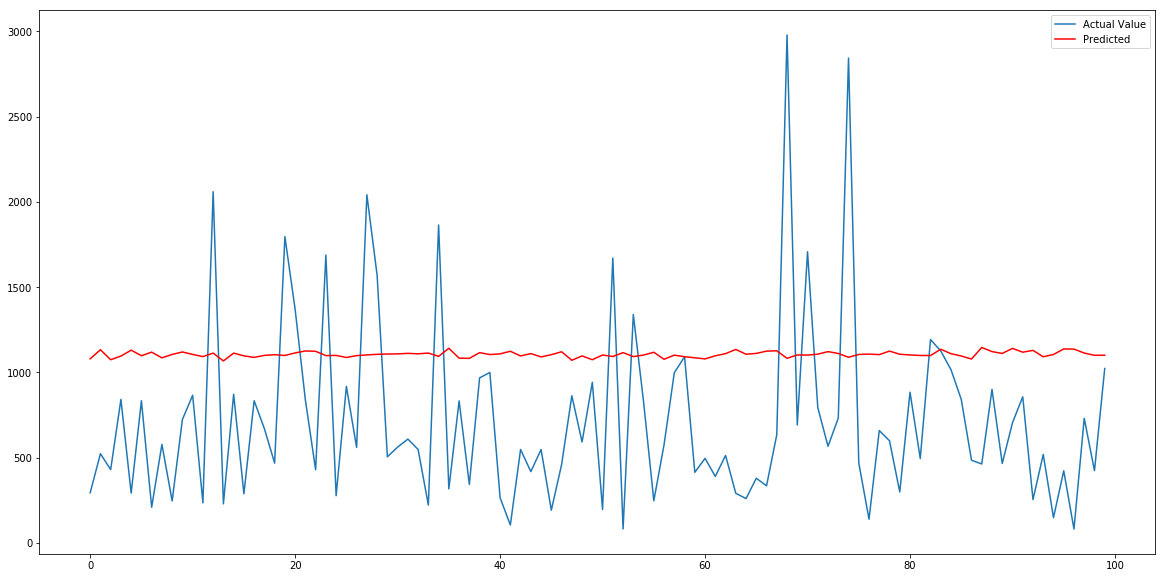

In [394]:
print(np.mean(np.abs((Y_test - pred) / Y_test)) * 100)
plt.figure(figsize=(20,10))
plt.plot(Y_test[:100],label="Actual Value")
plt.plot(pred[:100],label='Predicted',color='r')
plt.legend()

In [395]:
print(pred[:10],Y_test[:10])

[1079.89331505 1133.11239489 1074.61131286 1095.8839483  1130.69570258
 1097.91575039 1119.15359379 1085.43621845 1105.61719963 1119.9923158 ] [294. 523. 430. 842. 292. 834. 209. 578. 246. 724.]


In [390]:
data.corr()

,duration_sec,start_station_id,end_station_id,bike_id,member_birth_year,member_birth_age,S_Hour,S_Minute,S_Sec
duration_sec,1.000000,0.003569,0.011965,-0.012617,0.160916,-0.160916,0.002376,0.000095,0.000744
start_station_id,0.003569,1.000000,0.570371,-0.048995,0.058199,-0.058199,0.011893,0.003251,0.000057
end_station_id,0.011965,0.570371,1.000000,-0.050836,0.064489,-0.064489,0.110132,0.002965,0.000009
bike_id,-0.012617,-0.048995,-0.050836,1.000000,-0.014256,0.014256,-0.011012,-0.003083,0.000913
member_birth_year,0.160916,0.058199,0.064489,-0.014256,1.000000,-1.000000,0.066549,0.011040,-0.000933
member_birth_age,-0.160916,-0.058199,-0.064489,0.014256,-1.000000,1.000000,-0.066549,-0.011040,0.000933
S_Hour,0.002376,0.011893,0.110132,-0.011012,0.066549,-0.066549,1.000000,-0.070057,-0.001501
S_Minute,0.000095,0.003251,0.002965,-0.003083,0.011040,-0.011040,-0.070057,1.000000,0.001239
S_Sec,0.000744,0.000057,0.000009,0.000913,-0.000933,0.000933,-0.001501,0.001239,1.000000


In [415]:
data=pd.read_csv("data.csv")
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [416]:
del data['start_station_name'],data['start_station_latitude'],data['start_station_longitude'],data['end_station_name'],data['end_station_latitude'],data['end_station_longitude']

In [417]:
data.head()

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,43,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,96,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,245,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,5,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,247,3167,Subscriber,1997.0,Female


In [418]:
del data['user_type'],data['member_birth_year'],data['member_gender']

In [419]:
data.head()

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,43,96
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,96,88
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,245,1094
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,5,2831
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,247,3167


In [420]:
data['S_Day'], data['S_Time'] = data['start_time'].str.split(' ', 1).str
data['E_Day'], data['E_Time'] = data['end_time'].str.split(' ', 1).str

In [422]:
del data['start_time'],data['end_time']
data.head()

,duration_sec,start_station_id,end_station_id,bike_id,S_Day,S_Time,E_Day,E_Time
0,80110,74,43,96,2017-12-31,16:57:39.6540,2018-01-01,15:12:50.2450
1,78800,284,96,88,2017-12-31,15:56:34.8420,2018-01-01,13:49:55.6170
2,45768,245,245,1094,2017-12-31,22:45:48.4110,2018-01-01,11:28:36.8830
3,62172,60,5,2831,2017-12-31,17:31:10.6360,2018-01-01,10:47:23.5310
4,43603,239,247,3167,2017-12-31,14:23:14.0010,2018-01-01,02:29:57.5710


In [424]:
data[['S_Hour','S_Minute','S_Sec']] = data['S_Time'].str.split(':',expand=True)
del data['S_Time']
data[['E_Hour','E_Minute','E_Sec']] = data['E_Time'].str.split(':',expand=True)
del data['E_Time']

In [425]:
data.head()

,duration_sec,start_station_id,end_station_id,bike_id,S_Day,E_Day,S_Hour,S_Minute,S_Sec,E_Hour,E_Minute,E_Sec
0,80110,74,43,96,2017-12-31,2018-01-01,16,57,39.6540,15,12,50.2450
1,78800,284,96,88,2017-12-31,2018-01-01,15,56,34.8420,13,49,55.6170
2,45768,245,245,1094,2017-12-31,2018-01-01,22,45,48.4110,11,28,36.8830
3,62172,60,5,2831,2017-12-31,2018-01-01,17,31,10.6360,10,47,23.5310
4,43603,239,247,3167,2017-12-31,2018-01-01,14,23,14.0010,02,29,57.5710


In [426]:
data[['S_Year','S_Month','S_date']] = data['S_Day'].str.split('-',expand=True)
del data['S_Day'],data['S_Year']
data[['E_Year','E_Month','E_date']] = data['E_Day'].str.split('-',expand=True)
del data['E_Day']

In [428]:
del data['S_Sec'],data['E_Sec']
data.head()

,duration_sec,start_station_id,end_station_id,bike_id,S_Hour,S_Minute,E_Hour,E_Minute,S_Month,S_date,E_Month,E_date
0,80110,74,43,96,16,57,15,12,12,31,01,01
1,78800,284,96,88,15,56,13,49,12,31,01,01
2,45768,245,245,1094,22,45,11,28,12,31,01,01
3,62172,60,5,2831,17,31,10,47,12,31,01,01
4,43603,239,247,3167,14,23,02,29,12,31,01,01


In [430]:
data2=data.copy()

In [432]:
data['S_Minute']=data['S_Minute'].apply(lambda x:int(x))
data['E_Minute']=data['E_Minute'].apply(lambda x:int(x))
data.head()

,duration_sec,start_station_id,end_station_id,bike_id,S_Hour,S_Minute,E_Hour,E_Minute,S_Month,S_date,E_Month,E_date
0,80110,74,43,96,16,5,15,1,12,31,01,01
1,78800,284,96,88,15,5,13,4,12,31,01,01
2,45768,245,245,1094,22,4,11,2,12,31,01,01
3,62172,60,5,2831,17,3,10,4,12,31,01,01
4,43603,239,247,3167,14,2,02,2,12,31,01,01


In [467]:
filtered=data.groupby(['start_station_id', 'S_Month','E_Month','S_date','E_date','S_Hour','E_Hour','E_Minute','S_Minute'])['bike_id'].sum()

In [468]:
filtered

start_station_id  S_Month  E_Month  S_date  E_date  S_Hour  E_Hour  E_Minute  S_Minute
3                 06       06       29      29      14      14      5         3           1100
                                                    15      15      3         2           1058
                                                    16      16      5         3            169
                                                                              4            637
                                                    17      17      4         3            706
                                                                              4            709
                                                                    5         3           1021
                                                                              4            851
                                                    18      18      2         1            815
                                                          

In [470]:
dat=dat[:,0:]

array([[6.66666667e-01, 9.50000000e-01, 6.60900000e-01, 7.40000000e+01,
        8.01100000e+04],
       [6.25000000e-01, 9.33333333e-01, 5.80700000e-01, 2.84000000e+02,
        7.88000000e+04],
       [9.16666667e-01, 7.50000000e-01, 8.06850000e-01, 2.45000000e+02,
        4.57680000e+04],
       ...,
       [3.75000000e-01, 7.83333333e-01, 6.05783333e-01, 2.10000000e+01,
        4.24000000e+02],
       [3.75000000e-01, 7.83333333e-01, 6.94400000e-01, 5.80000000e+01,
        3.66000000e+02],
       [3.75000000e-01, 8.16666667e-01, 7.72950000e-01, 2.50000000e+01,
        1.88000000e+02]])

In [480]:
data['S_Hour']=data['S_Hour'].apply(int)
data['S_Hour']=data['S_Hour'].apply(lambda x:float(x)/24)



array([[6.66666667e-01, 7.40000000e+01, 8.01100000e+04],
       [6.25000000e-01, 2.84000000e+02, 7.88000000e+04],
       [9.16666667e-01, 2.45000000e+02, 4.57680000e+04],
       ...,
       [3.75000000e-01, 2.10000000e+01, 4.24000000e+02],
       [3.75000000e-01, 5.80000000e+01, 3.66000000e+02],
       [3.75000000e-01, 2.50000000e+01, 1.88000000e+02]])

In [486]:
maximum=max(data['start_station_id'])
data['start_station_id']=data['start_station_id'].apply(lambda x:float(x)/maximum)
dat=np.array([data['S_Hour'],data['start_station_id'],data['duration_sec']]).T
dat

X=dat[:,:2]
Y=dat[:,2]
print(X)
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33,random_state=42)

[[0.66666667 0.21764706]
 [0.625      0.83529412]
 [0.91666667 0.72058824]
 ...
 [0.375      0.06176471]
 [0.375      0.17058824]
 [0.375      0.07352941]]
[80110. 78800. 45768. ...   424.   366.   188.]


In [487]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [491]:
pred=model.predict(X_test)

143.32313983026265


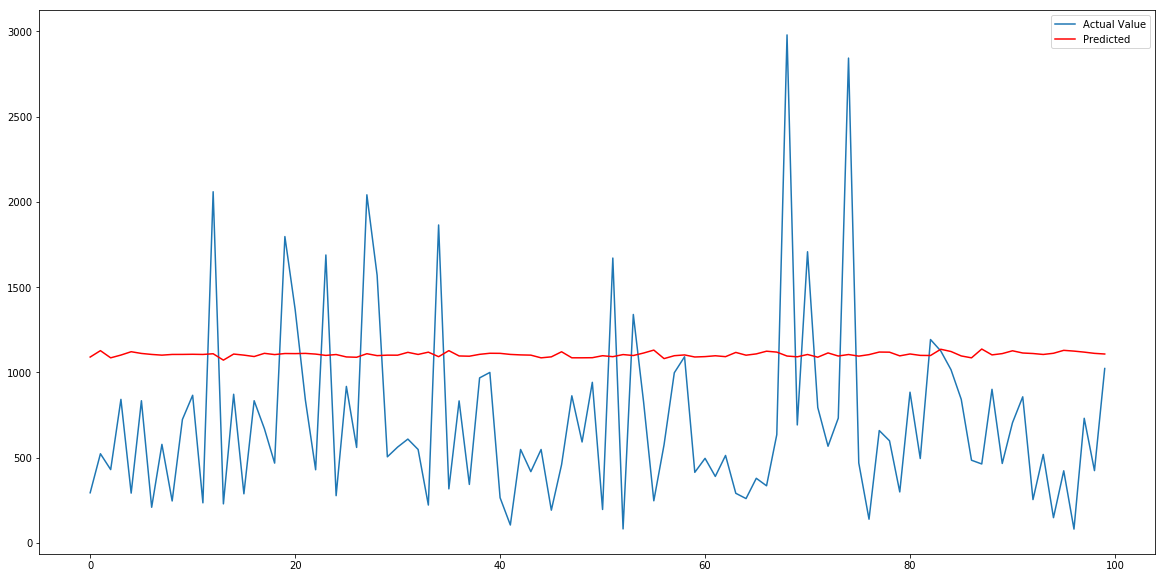

In [490]:
print(np.mean(np.abs((Y_test - pred) / Y_test)) * 100)
plt.figure(figsize=(20,10))
plt.plot(Y_test[:100],label="Actual Value")
plt.plot(pred[:100],label='Predicted',color='r')
plt.legend()